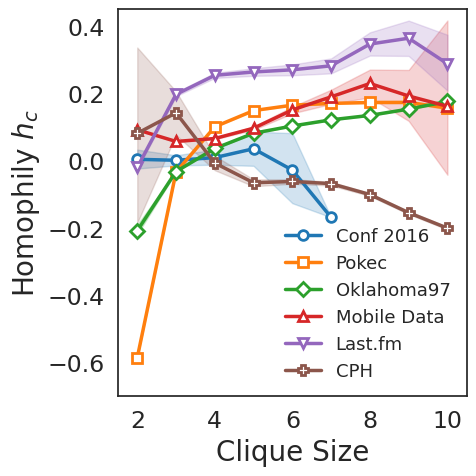

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Set Seaborn style without grid
sns.set_theme(style="white", font_scale=1.2)

def plot_(data_sets_names, label_map=None):
    plt.figure(figsize=(5, 5))  # Adjust figure size for better aspect ratio

    # Use Seaborn's color palette
    palette = sns.color_palette("tab10", n_colors=len(data_sets_names))
    markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '<', '>', '*']
    marker_color_combinations = itertools.cycle(zip(palette, markers))

    for _set in data_sets_names:
        homophily_means = np.load('../data/'+_set + '_homophily_means.npy', allow_pickle=True).item()
        homophily_lowers = np.load('../data/'+_set + '_homophily_lowers.npy', allow_pickle=True).item()
        homophily_uppers = np.load('../data/'+_set + '_homophily_uppers.npy', allow_pickle=True).item()

        # Filter clique sizes ≤ 12
        clique_sizes = [c for c in homophily_means.keys() if c <= 10]
        homophily_values_list = [homophily_means[c] for c in clique_sizes]
        error_lower = [homophily_means[c] - homophily_lowers[c] for c in clique_sizes]
        error_upper = [homophily_uppers[c] - homophily_means[c] for c in clique_sizes]

        # Ensure error values are non-negative for plotting
        error_lower = [max(0, el) for el in error_lower]
        error_upper = [max(0, eu) for eu in error_upper]

        # Get the next color and marker combination
        color, marker = next(marker_color_combinations)

        # Plot main line
        plt.plot(
            clique_sizes, homophily_values_list,
            color=color, linestyle='-', linewidth=2.5,
            marker=marker, markersize=7,
            markerfacecolor='white', markeredgecolor=color, markeredgewidth=2,
            label=label_map.get(_set, _set)  # Use label_map if available
        )

        # Add transparent error band instead of error bars
        plt.fill_between(
            clique_sizes,
            np.array(homophily_values_list) - np.array(error_lower),
            np.array(homophily_values_list) + np.array(error_upper),
            color=color, alpha=0.2  # Transparency for the confidence interval
        )

    # Labels and axis formatting
    plt.xlabel('Clique Size', fontsize=20)
    plt.ylabel('Homophily $h_c$', fontsize=20)
    plt.xticks(ticks=range(2, 14, 2), fontsize=17)  # Set x-axis ticks for better readability
    plt.yticks(fontsize=17)
    plt.ylim(-0.7, .45)  # Keep y-axis limits for consistency
    plt.xlim(1.5, 10.5)  # Restrict x-axis to clique sizes 1–12

    # Legend **inside** the plot, positioned at upper right
    #plt.legend(fontsize=12, title="Datasets", title_fontsize=14, frameon=False)
    plt.legend(frameon=False, fontsize=13, loc = 4)  # Reduce legend font size

    plt.tight_layout()  # Prevent label cutoff
    plt.savefig('../results/2b.pdf', dpi=300, bbox_inches='tight')  # High-res save
    plt.show()

# Dataset names and labels
#data_sets_names = ['conf_16', 'last_fm', 'mobile', 'Oberlin44', 'Pokec', 'cph']
data_sets_names = ['conf_16', 'Pokec', 'Oklahoma97', 'mobile', 'last_fm', 'cph']

label_map = {
    'conf_16': 'Conf 2016',
    'last_fm': 'Last.fm',
    'mobile': 'Mobile Data',
    'Oberlin44': 'Oberlin FB',
    'Pokec': 'Pokec',
    'cph': 'CPH'
}

# Call function
plot_(data_sets_names, label_map)

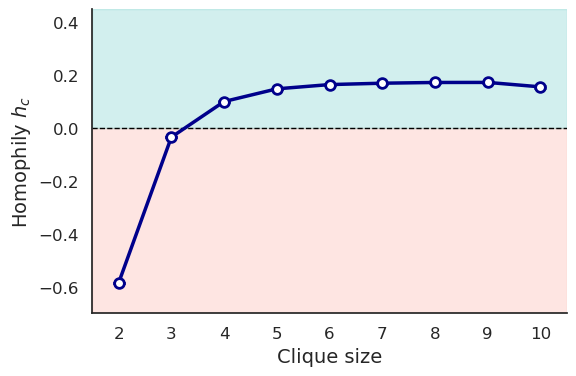

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_pokec_transition_nice():
    # Directory containing bootstrap .npy files
    boots_dir = Path("../data")
    
    # File paths
    mean_file  = boots_dir / "Pokec_homophily_means.npy"
    lower_file = boots_dir / "Pokec_homophily_lowers.npy"
    upper_file = boots_dir / "Pokec_homophily_uppers.npy"
    
    # Load data
    means  = np.load(mean_file, allow_pickle=True).item()
    lowers = np.load(lower_file, allow_pickle=True).item()
    uppers = np.load(upper_file, allow_pickle=True).item()
    
    # Prepare data for clique sizes up to 10
    sizes   = sorted([c for c in means if c <= 10])
    h_vals  = np.array([means[c]           for c in sizes])
    err_low = np.array([means[c] - lowers[c] for c in sizes])
    err_up  = np.array([uppers[c] - means[c] for c in sizes])
    yerr    = np.vstack([err_low, err_up])
    
    # Plot setup
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_ylim(-0.7, 0.45)
    ax.set_xlim(1.5, 10.5)
    
    # Shade heterophily vs. homophily regions
    ax.axhspan(-0.7, 0, color='salmon', alpha=0.2)
    ax.axhspan(0, 0.45, color='lightseagreen', alpha=0.2)
    
    # Plot error bars
    ax.errorbar(
        sizes, h_vals, yerr=yerr,
        fmt='o-', capsize=4, linewidth=2.5, markersize=7,
        markerfacecolor='white', markeredgewidth=2,
        markeredgecolor='darkblue', color='darkblue'
    )
    
    # Dashed reference line at 0
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    
    # Axis labels and style
    ax.set_xlabel("Clique size", fontsize=14)
    ax.set_ylabel("Homophily $h_c$", fontsize=14)
    ax.set_xticks(sizes)
    ax.tick_params(axis='both', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    # Save figure back into boots directory
    out_path = boots_dir / "pokec_homophily_transition_nice.pdf"
    #plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()
    #print(f"Figure saved to {out_path}")

# Execute the plotting function
plot_pokec_transition_nice()
